#📌 Extracão

In [ ]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variável URL para carregar e armazenar os dados JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

# Criar um DataFrame para ler e armazenar os dados
df = pd.read_json(url)

# Exibir as primeiras linhas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

###Conhecendo o Dataset

In [ ]:
df = requests.get(url)
dados = json.loads(df.text)
df = pd.json_normalize(dados, sep = '_')
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Dicionário de dados
customerID: número de identificação único de cada cliente

Churn: se o cliente deixou ou não a empresa

gender: gênero (masculino e feminino)

SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos

Partner: se o cliente possui ou não um parceiro ou parceira

Dependents: se o cliente possui ou não dependentes

tenure: meses de contrato do cliente

PhoneService: assinatura de serviço telefônico

MultipleLines: assisnatura de mais de uma linha de telefone

InternetService: assinatura de um provedor internet

OnlineSecurity: assinatura adicional de segurança online

OnlineBackup: assinatura adicional de backup online

DeviceProtection: assinatura adicional de proteção no dispositivo

TechSupport: assinatura adicional de suporte técnico, menos tempo de espera

StreamingTV: assinatura de TV a cabo

StreamingMovies: assinatura de streaming de filmes

Contract: tipo de contrato

PaperlessBilling: se o cliente prefere receber online a fatura

PaymentMethod: forma de pagamento

Charges.Monthly: total de todos os serviços do cliente por mês

Charges.Total: total gasto pelo cliente

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
df.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


### Traduzindo

In [ ]:
# dicionário de tradução
traduzir_colunas = {
    'customerID': 'id_Cliente',
    'Churn': 'evasao',
    'customer_gender': 'genero',
    'customer_SeniorCitizen': 'idoso',
    'customer_Partner': 'companheiro',
    'customer_Dependents': 'dependentes',
    'customer_tenure': 'meses_de_contrato',
    'phone_PhoneService': 'servico_telefonico',
    'phone_MultipleLines': 'multiplas_linhas',
    'internet_InternetService': 'tipo_internet',
    'internet_OnlineSecurity': 'seguranca_online',
    'internet_OnlineBackup': 'backup_online',
    'internet_DeviceProtection': 'protecao_dispositivo',
    'internet_TechSupport': 'suporte_tecnico',
    'internet_StreamingTV': 'streaming_tv',
    'internet_StreamingMovies': 'streaming_filmes',
    'account_Contract': 'tipo_contrato',
    'account_PaperlessBilling': 'fatura_digital',
    'account_PaymentMethod': 'forma_pagamento',
    'account_Charges_Monthly': 'gasto_mensal',
    'account_Charges_Total': 'gasto_total',
}

# renomeando as colunas
df.rename(columns=traduzir_colunas, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_Cliente            7267 non-null   object 
 1   evasao                7267 non-null   object 
 2   genero                7267 non-null   object 
 3   idoso                 7267 non-null   int64  
 4   companheiro           7267 non-null   object 
 5   dependentes           7267 non-null   object 
 6   meses_de_contrato     7267 non-null   int64  
 7   servico_telefonico    7267 non-null   object 
 8   multiplas_linhas      7267 non-null   object 
 9   tipo_internet         7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   object 
 13  suporte_tecnico       7267 non-null   object 
 14  streaming_tv          7267 non-null   object 
 15  streaming_filmes     

In [ ]:
# Verificando os dados únicos para traduzir
for i in list(df.columns):
  print(f'{i}{df[i].unique()}')

id_Cliente['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
evasao['No' 'Yes' '']
genero['Female' 'Male']
idoso[0 1]
companheiro['Yes' 'No']
dependentes['Yes' 'No']
meses_de_contrato[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
servico_telefonico['Yes' 'No']
multiplas_linhas['No' 'Yes' 'No phone service']
tipo_internet['DSL' 'Fiber optic' 'No']
seguranca_online['No' 'Yes' 'No internet service']
backup_online['Yes' 'No' 'No internet service']
protecao_dispositivo['No' 'Yes' 'No internet service']
suporte_tecnico['Yes' 'No' 'No internet service']
streaming_tv['Yes' 'No' 'No internet service']
streaming_filmes['No' 'Yes' 'No internet service']
tipo_contrato['One year' 'Month-to-month' 'Two year']
fatura_digital['Yes' 'No']
forma_pagamento['Mailed check' 'Electronic check' 'Credit

In [ ]:
#traduzir colunas categóricas
traduzir_categoricos = {'Yes' : 'Sim' , 'No' : 'Nao' , 'No phone service' : 'Sem servico de telefone' , 'No internet service' : 'Sem servico de internet', 'Fiber optic': 'Fibra óptica' }

colunas_categoricas = ['evasao', 'companheiro', 'dependentes', 'servico_telefonico', 'multiplas_linhas', 'tipo_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo',
                       'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'fatura_digital']

for coluna in colunas_categoricas:
    df[coluna].replace(traduzir_categoricos, inplace=True)

/tmp/ipython-input-2544322657.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].replace(traduzir_categoricos, inplace=True)


In [ ]:
# Traduzir formas de pagamento
tipo_pagamento = {'Mailed check':'Cheque', 'Electronic check': 'Cheque eletrônico', 'Credit card (automatic)': 'Cartão de crédito automático', 'Bank transfer (automatic)': 'Transferência bancária automático'}
df.replace({'forma_pagamento': tipo_pagamento}, inplace=True)

In [ ]:
# Traduzir tipos de contratos
contratos = {'Month-to-month' : 'Mensal', 'Two year': 'Bienal', 'One year': 'Anual'}
df.replace({'tipo_contrato': contratos}, inplace=True)

In [ ]:
# Traduzir gênero
tipo_genero = {'Male': 'Homem' , 'Female': 'Mulher'}
df.replace({'genero': tipo_genero}, inplace=True)

In [ ]:
# Transformar o campo idoso
df['idoso'] = df['idoso'].replace({1: 'Sim', 0: 'Nao'})

In [ ]:
# Verificando as traduções
for i in list(df.columns):
  print(f'{i}{df[i].unique()}')

id_Cliente['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
evasao['Nao' 'Sim' '']
genero['Mulher' 'Homem']
idoso['Nao' 'Sim']
companheiro['Sim' 'Nao']
dependentes['Sim' 'Nao']
meses_de_contrato[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
servico_telefonico['Sim' 'Nao']
multiplas_linhas['Nao' 'Sim' 'Sem servico de telefone']
tipo_internet['DSL' 'Fibra óptica' 'Nao']
seguranca_online['Nao' 'Sim' 'Sem servico de internet']
backup_online['Sim' 'Nao' 'Sem servico de internet']
protecao_dispositivo['Nao' 'Sim' 'Sem servico de internet']
suporte_tecnico['Sim' 'Nao' 'Sem servico de internet']
streaming_tv['Sim' 'Nao' 'Sem servico de internet']
streaming_filmes['Nao' 'Sim' 'Sem servico de internet']
tipo_contrato['Anual' 'Mensal' 'Bienal']
fatura_digital['Sim' 'Nao']
forma_pagamento[

### Verificando Inconsistências nos Dados

In [ ]:
# Verificar a existência de clientes duplicados
if df.id_Cliente.nunique() == df.shape[0]:
    print('Sem ocorrência de clientes duplicados')
else:
    print('Existem clientes duplicados')

Sem ocorrência de clientes duplicados


In [ ]:
# Verificando inconsistência no campo evasão.
df.evasao.value_counts()

,count
evasao,
Nao,5174
Sim,1869
,224


In [ ]:
# Verificar a inconsistência entre os campos servico_telefonico e multiplas_linhas
qtde_sem_telefone = len(df.loc[df.servico_telefonico == "Nao"])
qtde_sem_mult_linhas = len(df.loc[df.multiplas_linhas == 'Sem servico de telefone'])

if qtde_sem_telefone == qtde_sem_mult_linhas:
    print('Sem inconsistência')
else:
    print('Com inconsistência')

Sem inconsistência


In [ ]:
# Verificar a inconsistência nos campos relacionados ao serviço de internet
qtde_sem_internet = len(df.loc[df.tipo_internet == 'Nao'])

servico_internet = ['seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes']

for i in servico_internet:
    if len(df[df[i] =='Sem servico de internet']) == qtde_sem_internet:
        print(f'{i} Sem inconsistência')
    else:
        print(f'{i} Com inconsistência')

seguranca_online Sem inconsistência
backup_online Sem inconsistência
protecao_dispositivo Sem inconsistência
suporte_tecnico Sem inconsistência
streaming_tv Sem inconsistência
streaming_filmes Sem inconsistência


### Tratando as Inconsistências

In [ ]:
# Remover os valores nulos do campo evasão
df = df[df.evasao != '']
df.evasao.value_counts()

,count
evasao,
Nao,5174
Sim,1869


In [ ]:
# Transformar o campo gasto total em float64
df['gasto_total'] = pd.to_numeric(df['gasto_total'], errors='coerce')
df.gasto_total.dtypes

dtype('float64')

In [ ]:
# Verificar avalores nulos no campo gasto total
df[df.gasto_total.isna()]

,id_Cliente,evasao,genero,idoso,companheiro,dependentes,meses_de_contrato,servico_telefonico,multiplas_linhas,tipo_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,forma_pagamento,gasto_mensal,gasto_total
975,1371-DWPAZ,Nao,Mulher,Nao,Sim,Sim,0,Nao,Sem servico de telefone,DSL,...,Sim,Sim,Sim,Sim,Nao,Bienal,Nao,Cartão de crédito automático,56.05,NaN
1775,2520-SGTTA,Nao,Mulher,Nao,Sim,Sim,0,Sim,Nao,Nao,...,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Bienal,Nao,Cheque,20.00,NaN
1955,2775-SEFEE,Nao,Homem,Nao,Nao,Sim,0,Sim,Sim,DSL,...,Sim,Nao,Sim,Nao,Nao,Bienal,Sim,Transferência bancária automático,61.90,NaN
2075,2923-ARZLG,Nao,Homem,Nao,Sim,Sim,0,Sim,Nao,Nao,...,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Anual,Sim,Cheque,19.70,NaN
2232,3115-CZMZD,Nao,Homem,Nao,Nao,Sim,0,Sim,Nao,Nao,...,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Bienal,Nao,Cheque,20.25,NaN
2308,3213-VVOLG,Nao,Homem,Nao,Sim,Sim,0,Sim,Sim,Nao,...,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Bienal,Nao,Cheque,25.35,NaN
2930,4075-WKNIU,Nao,Mulher,Nao,Sim,Sim,0,Sim,Sim,DSL,...,Sim,Sim,Sim,Sim,Nao,Bienal,Nao,Cheque,73.35,NaN
3134,4367-NUYAO,Nao,Homem,Nao,Sim,Sim,0,Sim,Sim,Nao,...,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Bienal,Nao,Cheque,25.75,NaN
3203,4472-LVYGI,Nao,Mulher,Nao,Sim,Sim,0,Nao,Sem servico de telefone,DSL,...,Nao,Sim,Sim,Sim,Nao,Bienal,Sim,Transferência bancária automático,52.55,NaN
4169,5709-LVOEQ,Nao,Mulher,Nao,Sim,Sim,0,Sim,Nao,DSL,...,Sim,Sim,Nao,Sim,Sim,Bienal,Nao,Cheque,80.85,NaN


In [ ]:
# Substituir os valores nulos, no campo gasto total, por 0
df['gasto_total'] = df['gasto_total'].fillna(0)
df[df.gasto_total.isna()]

,id_Cliente,evasao,genero,idoso,companheiro,dependentes,meses_de_contrato,servico_telefonico,multiplas_linhas,tipo_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,forma_pagamento,gasto_mensal,gasto_total


In [ ]:
# Criar o campo contas_diarias
df.insert(19, 'contas_diarias', round(df.gasto_mensal / 30, 2), True)
df.head()

,id_Cliente,evasao,genero,idoso,companheiro,dependentes,meses_de_contrato,servico_telefonico,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,forma_pagamento,contas_diarias,gasto_mensal,gasto_total
0,0002-ORFBO,Nao,Mulher,Nao,Sim,Sim,9,Sim,Nao,DSL,...,Nao,Sim,Sim,Nao,Anual,Sim,Cheque,2.19,65.6,593.30
1,0003-MKNFE,Nao,Homem,Nao,Nao,Nao,9,Sim,Sim,DSL,...,Nao,Nao,Nao,Sim,Mensal,Nao,Cheque,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Homem,Nao,Nao,Nao,4,Sim,Nao,Fibra óptica,...,Sim,Nao,Nao,Nao,Mensal,Sim,Cheque eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Homem,Sim,Sim,Nao,13,Sim,Nao,Fibra óptica,...,Sim,Nao,Sim,Sim,Mensal,Sim,Cheque eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Mulher,Sim,Sim,Nao,3,Sim,Nao,Fibra óptica,...,Nao,Sim,Sim,Nao,Mensal,Sim,Cheque,2.80,83.9,267.40


#📊 Carga e análise

In [ ]:
# Análise descritiva para colunas numéricas
df.describe()

,meses_de_contrato,contas_diarias,gasto_mensal,gasto_total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2.158675,64.761692,2279.734304
std,24.559481,1.003088,30.090047,2266.794470
min,0.000000,0.610000,18.250000,0.000000
25%,9.000000,1.180000,35.500000,398.550000
50%,29.000000,2.340000,70.350000,1394.550000
75%,55.000000,2.990000,89.850000,3786.600000
max,72.000000,3.960000,118.750000,8684.800000


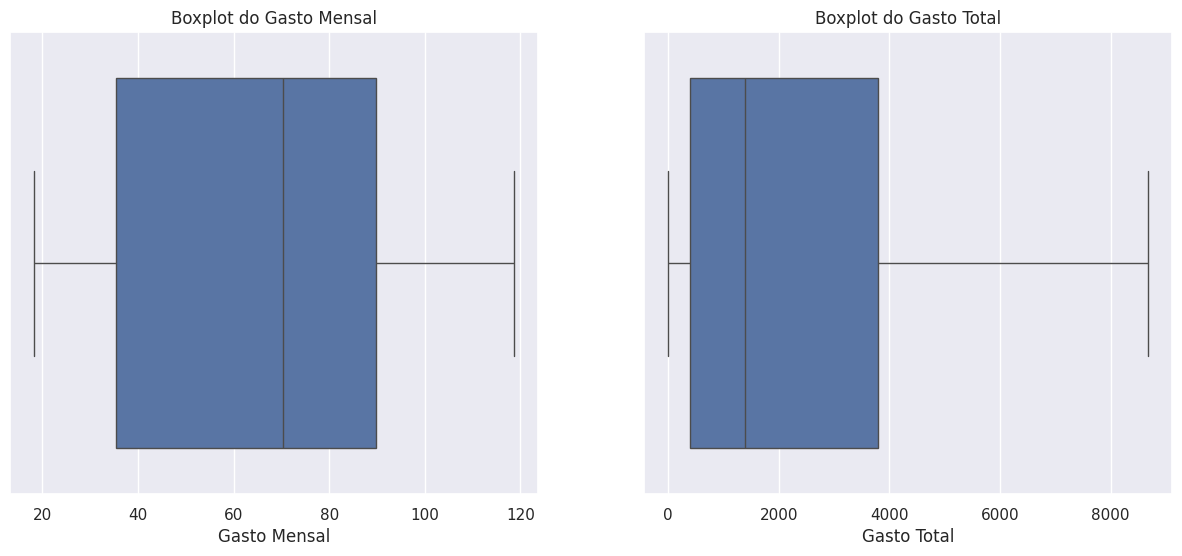

In [ ]:
# Plotar gráficos boxplot para verificar a presença de outliers
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.boxplot(x=df['gasto_mensal'], ax=ax[0])
ax[0].set_title('Boxplot do Gasto Mensal')
ax[0].set_xlabel('Gasto Mensal')
sns.boxplot(x=df['gasto_total'], ax=ax[1])
ax[1].set_title('Boxplot do Gasto Total')
ax[1].set_xlabel('Gasto Total')

plt.show()

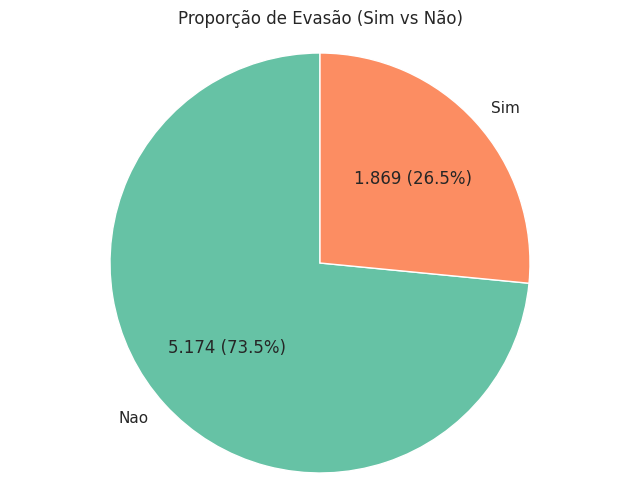

In [ ]:
# Contar os valores no campo evasao
contagem_evasao = df['evasao'].value_counts()

# Função para formatar a contagem e a porcentagem
def func(pct, allvalues):
    absoluto = int(pct / 100. * sum(allvalues))  # Calcula a contagem absoluta
    absoluto_formatado = f'{absoluto:,}'.replace(',', '.')
    return f'{absoluto_formatado} ({pct:.1f}%)'  # Retorna a string formatada

# Plotar gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(contagem_evasao, labels=contagem_evasao.index, autopct=lambda pct: func(pct, contagem_evasao), startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Proporção de Evasão (Sim vs Não)')
plt.axis('equal')
plt.show()

/tmp/ipython-input-2701449256.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='meses_de_contrato', data=df, palette='Spectral')


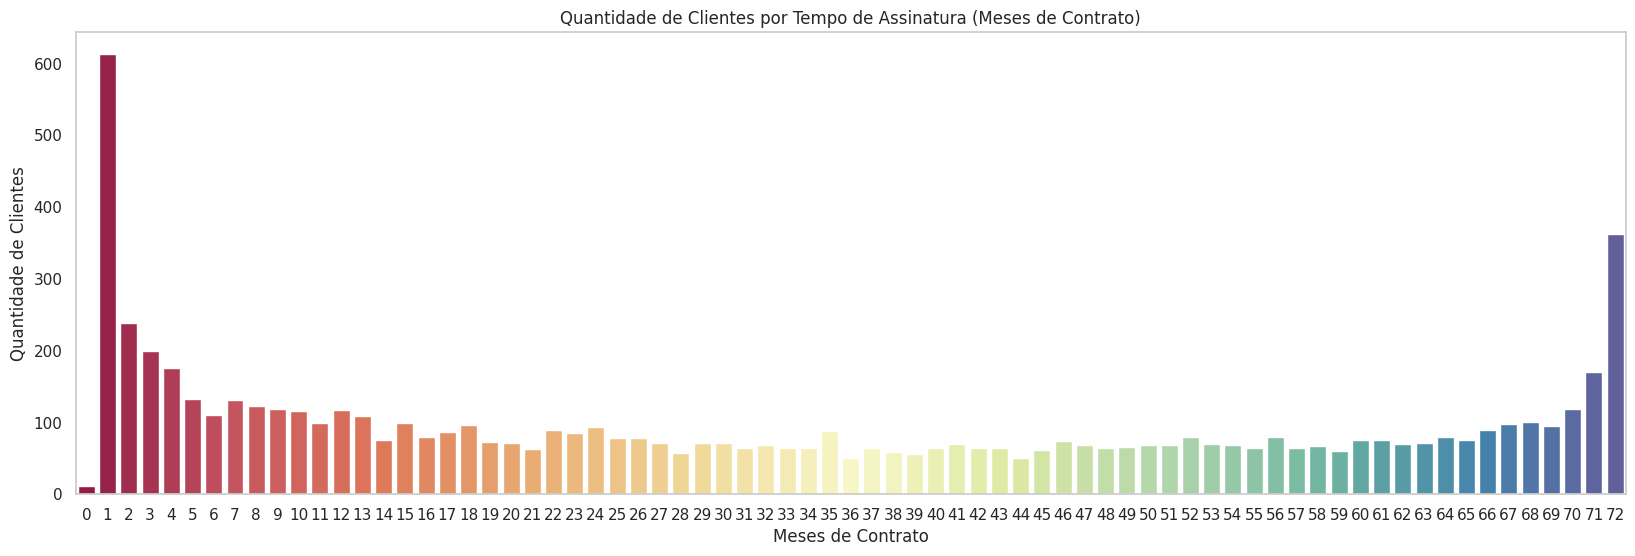

In [ ]:
# Configurações de estilo para os gráficos
sns.set(style="whitegrid")

# Gráfico de colunas para mostrar o quantitativo de clientes por meses de contrato
plt.figure(figsize=(20, 6))
sns.countplot(x='meses_de_contrato', data=df, palette='Spectral')
plt.title('Quantidade de Clientes por Tempo de Assinatura (Meses de Contrato)')
plt.xlabel('Meses de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.grid(axis='y')
plt.show()

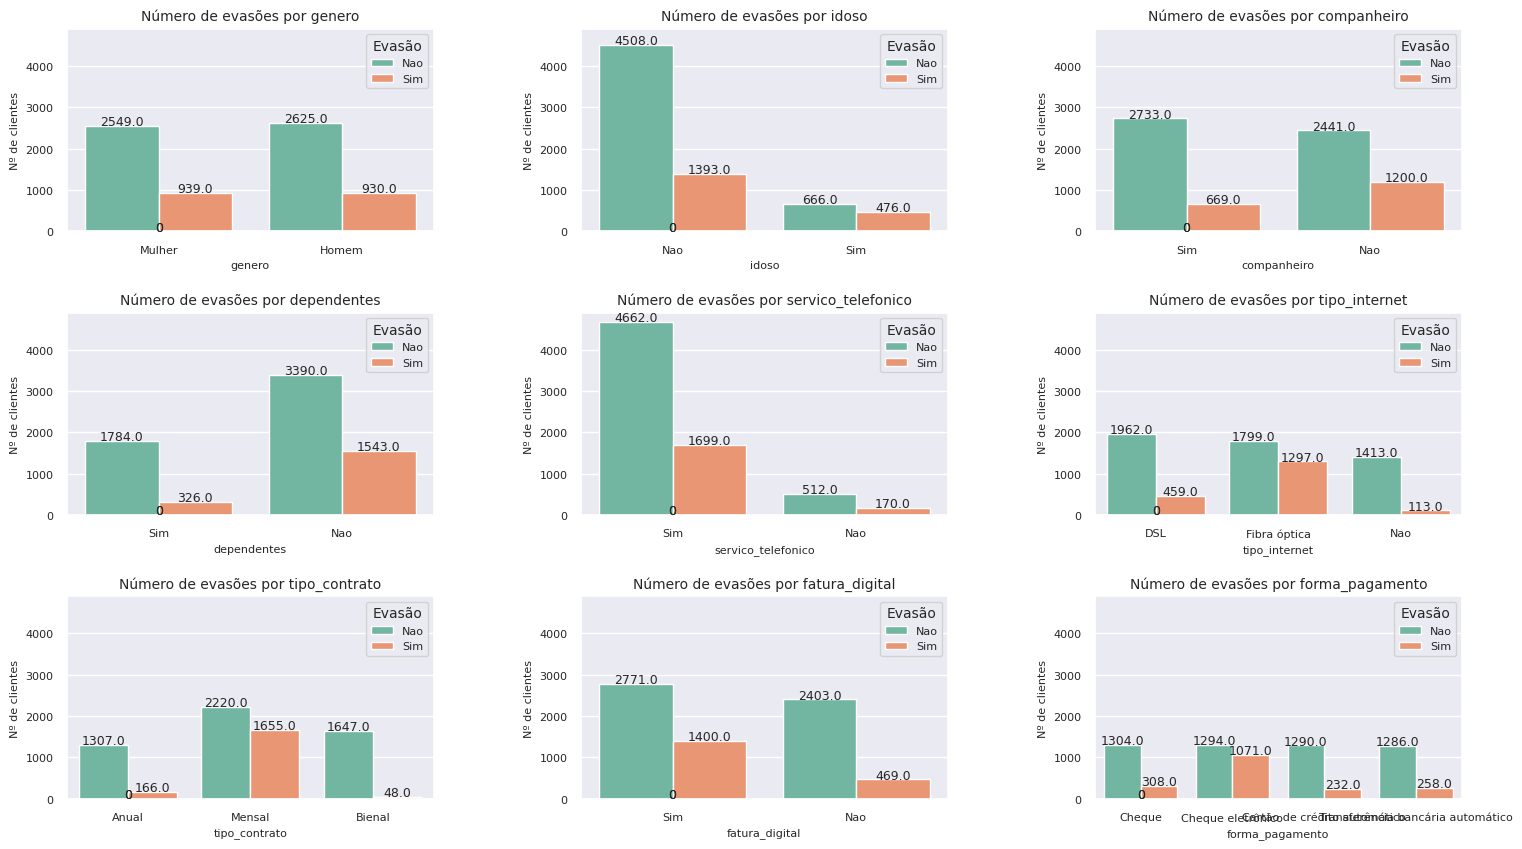

In [ ]:
# Contagem de Evasão por Variáveis Categóricas
variaveis_categoricas = ['genero', 'idoso', 'companheiro',
       'dependentes', 'servico_telefonico', 'tipo_internet', 'tipo_contrato', 'fatura_digital',
       'forma_pagamento',]

lista_variaveis_categoricas = list(enumerate(variaveis_categoricas))

sns.set(rc = {'figure.figsize':(18,10)})

axes = []
for i in lista_variaveis_categoricas:
    ax = plt.subplot(3, 3, i[0] + 1)
    axes.append(ax)
    sns.countplot(data = df,
                    x = i[1],
                    hue = 'evasao',
                    palette = {'#66c2a5', '#fc8d62'},
                    )

    ax.set_title(f'Número de evasões por {i[1]}', fontsize = 10)
    ax.set_ylabel('Nº de clientes', fontsize = 8)
    ax.set_xlabel(i[1], fontsize = 8)

    ax.legend(title='Evasão', fontsize=8, title_fontsize=10)

    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height + 20,
        '{:1}'.format((height)),
        ha='center',
        size = 9)

y_limits = [0, max(ax.get_ylim()[1] for ax in axes)]
for ax in axes:
    ax.set_ylim(y_limits)

plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

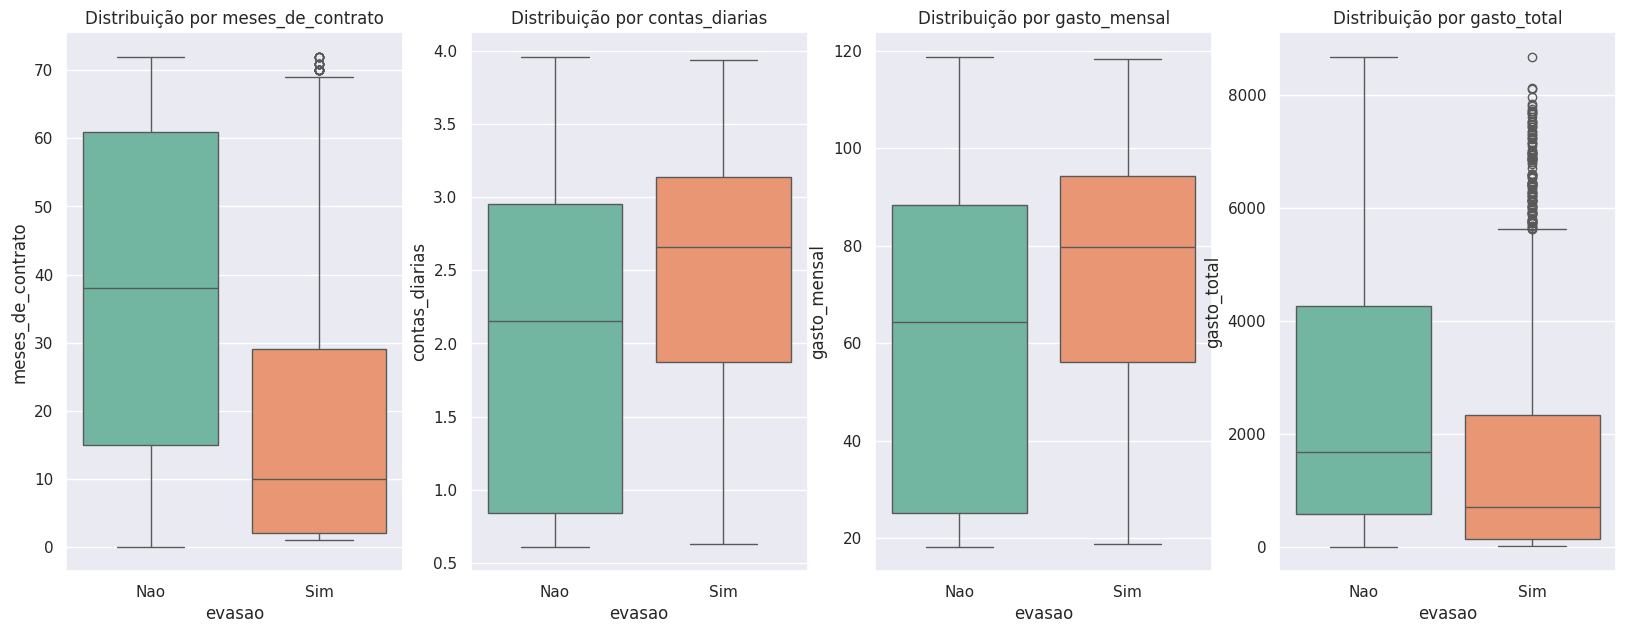

In [ ]:
#Contagem de Evasão por Variáveis Numéricas
variaveis_numericas = ['meses_de_contrato', 'contas_diarias', 'gasto_mensal', 'gasto_total']

lista_variaveis_numericas = list(enumerate(variaveis_numericas))

sns.set(rc = {'figure.figsize':(20,7)})

for i in lista_variaveis_numericas:

    plt.subplot(1, 4,  i[0]+1)
    ax_1 = sns.boxplot(data = df,
                    x = 'evasao',
                    y = i[1],
                    hue ='evasao',
                    palette = {'#66c2a5', '#fc8d62'},
                    legend=False,
                    )

    ax_1.set_title(f'Distribuição por {i[1]}', fontsize = 12)

plt.show()

#📄Relatorio Final

### Introdução
O desafio consistia em desenvolver uma parte do projeto "**Churn de Clientes**" da empresa **Telecom X**, que enfrenta um elevado índice de cancelamentos. A empresa busca compreender os fatores que contribuem para a perda de clientes.
### Limpeza e Tratamentos de Dados
A base de dados foi importada em formato JSON a partir de um repositório do GitHub. Em seguida, o arquivo JSON foi tratado e transformado em um DataFrame, permitindo a realização de verificações e correções de inconsistências. Essas etapas incluíram a identificação de dados ausentes, normalização, tradução e adaptação das informações.
### Análise Exploratória de Dados
Nesta etapa, realizamos atividades fundamentais para gerar respostas e insights. Foram conduzidas análises estatísticas, comparativas e resumos, permitindo a criação de visualizações por meio de gráficos. Isso facilitou uma análise mais aprofundada e, consequentemente, permitirá a tomada de decisões mais assetivas.
### Conclusões e insights
**Relação entre Gênero e Evasão**  
A análise indica que o gênero dos clientes não apresenta uma relação significativa com a taxa de evasão. Isso sugere que fatores além do gênero podem ser mais determinantes na decisão de cancelamento dos serviços.  
**Impacto da Idade e Situação Familiar**  
Observou-se que os clientes idosos, os que não possuem parceiros e os que não têm dependentes, apresentam uma tendência maior à evasão. Essa informação pode indicar a necessidade de estratégias específicas para atender a esse grupo demográfico.  
**Serviço de Fibra Óptica**  
Os clientes que utilizam o serviço de fibra óptica tendem a evadir mais frequentemente. Essa tendência pode refletir frustrações com a qualidade do serviço prestado, o que merece uma investigação mais aprofundada para identificar e resolver possíveis problemas.  
**Tipos de Contrato**  
A comparação entre os diferentes tipos de contrato revela que os contratos mensais apresentam uma taxa de evasão superior em relação aos contratos anuais ou de longo prazo. Isso sugere que a flexibilidade dos contratos mensais pode estar associada a uma maior propensão ao cancelamento.  
**Fatura Digital**  
Clientes que optam pela fatura digital demonstram uma taxa de evasão consideravelmente alta. Essa informação pode indicar a necessidade de melhorias na experiência do cliente relacionada ao processo de faturamento digital.  
**Pagamento com Cheque Eletrônico**  
A análise também revelou que os clientes que utilizam cheque eletrônico como forma de pagamento apresentam uma taxa de evasão elevada. Isso pode sugerir que essa modalidade de pagamento não está atendendo às expectativas dos clientes, o que requer uma avaliação mais detalhada.  

  
### Recomendações
**Desenvolver Programas de Retenção para Clientes Idosos**  
*   Criar programas específicos que atendam às necessidades dos clientes idosos, como suporte personalizado e ofertas de serviços que considerem suas preferências e limitações.
*   Oferecer consultorias ou visitas domiciliares para ajudar na utilização dos serviços.

**Melhorar a Qualidade do Serviço de Fibra Óptica**  
*   Realizar uma análise detalhada das reclamações e feedbacks dos clientes sobre o serviço de fibra óptica.  
*   Investir em melhorias na infraestrutura e no atendimento ao cliente para resolver problemas de qualidade e aumentar a satisfação.  

**Revisar Estrutura de Contratos**  
*   Considerar a introdução de contratos de longo prazo com benefícios adicionais, como descontos ou serviços extras, para incentivar a permanência dos clientes.  
*   Oferecer opções de contratos mensais com garantias de satisfação, permitindo que os clientes cancelem sem penalidades se não estiverem satisfeitos.  

**Aprimorar a Experiência de Faturamento Digital**  
*   Melhorar a interface e a usabilidade do sistema de fatura digital, garantindo que os clientes possam acessar e entender suas faturas facilmente.  
*   Implementar lembretes e notificações amigáveis sobre vencimentos e pagamentos, além de oferecer suporte para esclarecer dúvidas.  

**Analisar Modalidades de Pagamento**  
*   Investigar as razões pelas quais os clientes que pagam com cheque eletrônico estão mais propensos a cancelar. Isso pode incluir a análise de taxas, processos de pagamento ou a conveniência do método.  
*   Oferecer alternativas de pagamento mais convenientes e seguras, como débito automático ou pagamentos via aplicativos móveis.  

**Implementar Programas de Fidelidade**  
*   Criar um programa de fidelidade que recompense os clientes por sua permanência, oferecendo descontos, promoções exclusivas ou serviços adicionais.  
*   Incentivar a recomendação de novos clientes, oferecendo benefícios tanto para o cliente atual quanto para o novo cliente indicado.  

**Coletar Feedback Regularmente**  
*   Implementar pesquisas de satisfação e feedback após interações com o serviço ao cliente e após a utilização de serviços, para identificar áreas de melhoria.  
*   Utilizar as informações coletadas para ajustar estratégias e serviços, demonstrando aos clientes que suas opiniões são valorizadas.  

**Treinamento da Equipe de Atendimento ao Cliente**  
*   Investir em treinamento contínuo para a equipe de atendimento ao cliente, focando em habilidades de comunicação, resolução de problemas e empatia.  
*   Garantir que a equipe esteja bem informada sobre todos os serviços e produtos oferecidos, para que possam ajudar os clientes de forma eficaz.  


# ⭐Extra: Análise de Correlação entre Variáveis

In [ ]:
# Numerar o campo evasao e definidos os campos numericos para a correlação.
df['evasao_numerica'] = df['evasao'].map({'Sim': 1, 'Nao': 0})
correlacao_com_evasao = df[['evasao_numerica', 'gasto_mensal', 'gasto_total', 'contas_diarias', 'meses_de_contrato']].corr()
print(correlacao_com_evasao)

                   evasao_numerica  gasto_mensal  gasto_total  contas_diarias  \
evasao_numerica           1.000000      0.193356    -0.198324        0.193412   
gasto_mensal              0.193356      1.000000     0.651174        0.999996   
gasto_total              -0.198324      0.651174     1.000000        0.651189   
contas_diarias            0.193412      0.999996     0.651189        1.000000   
meses_de_contrato        -0.352229      0.247900     0.826178        0.247910   

                   meses_de_contrato  
evasao_numerica            -0.352229  
gasto_mensal                0.247900  
gasto_total                 0.826178  
contas_diarias              0.247910  
meses_de_contrato           1.000000  


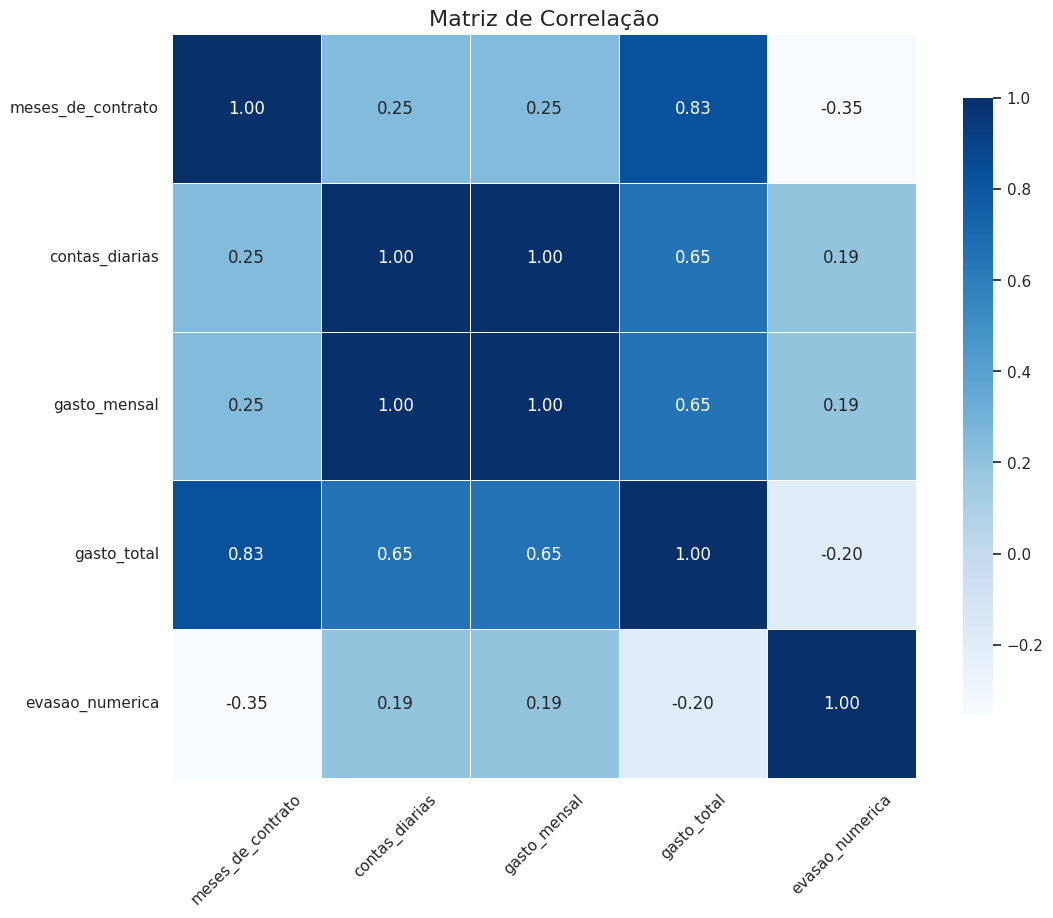

In [ ]:
# Selecionar apenas as colunas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
matriz_correlacao = df_numeric.corr()

# Criar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='Blues', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title('Matriz de Correlação', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

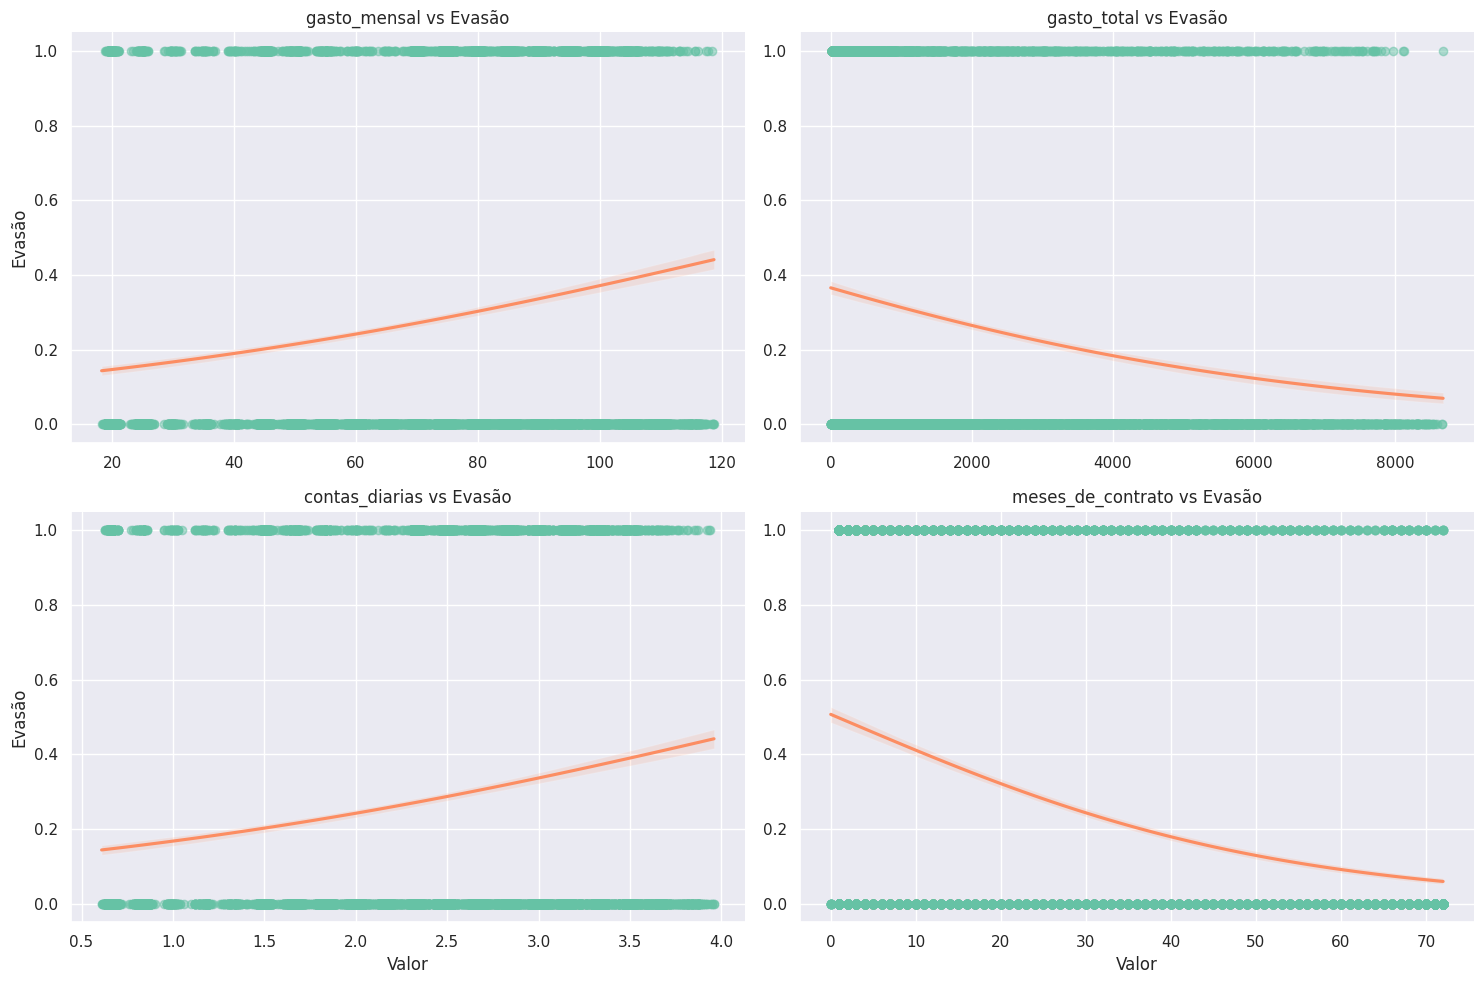

In [ ]:
# Criar um DataFrame com as variáveis para plotar
variaveis = ['gasto_mensal', 'gasto_total', 'contas_diarias', 'meses_de_contrato']

# Reorganizar os dados
df_melted = df.melt(id_vars=['evasao_numerica'], value_vars=variaveis, var_name='variable', value_name='value')

# Criar um FacetGrid para organizar os gráficos em um layout 2x2
g = sns.FacetGrid(df_melted, col='variable', col_wrap=2, height=5, aspect=1.5, sharey=False, sharex=False)

# Mapear o lmplot para cada variável
g.map(sns.regplot, 'value', 'evasao_numerica', logistic=True,
       scatter_kws={'color': '#66c2a5', 'alpha': 0.5},
       line_kws={'color': '#fc8d62'})

g.set_titles(col_template="{col_name} vs Evasão")
g.set_axis_labels("Valor", "Evasão")

plt.show()

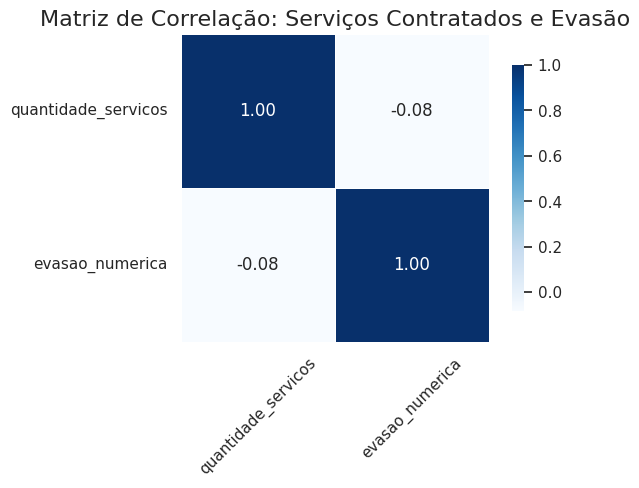

In [ ]:
# Convert 'Sim' and 'Nao' to numerical for the relevant columns
service_cols = ['seguranca_online', 'backup_online', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes']
for col in service_cols:
    df[col] = df[col].map({'Sim': 1, 'Nao': 0, 'Sem servico de internet': 0})

# Criar uma nova coluna que conta a quantidade de serviços contratados
df['quantidade_servicos'] = df[service_cols].sum(axis=1)

# Calcular a matriz de correlação
matriz_servicos = df[['quantidade_servicos', 'evasao_numerica']].corr()

# Criar o heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_servicos, annot=True, fmt=".2f", cmap='Blues', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)

# Ajustar o título e os rótulos
plt.title('Matriz de Correlação: Serviços Contratados e Evasão', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()